# Importando bibliotecas

In [20]:
import pandas as pd
import matplotlib.pyplot as plt


# Lendo e limpando o dataset

In [ ]:
df = pd.read_csv('/content/CusteioInvestimentoComercialIndustrialSemFiltros.csv')

In [ ]:
df.dtypes

In [47]:
missing_values = df.isnull().sum()
df = df.dropna()

In [ ]:
df['VlCusteio'] = df['VlCusteio'].str.replace(',','.')
df['VlCusteio'] = df['VlCusteio'].astype(float)
df['VlInvestimento'] = df['VlInvestimento'].str.replace(',','.')
df['VlInvestimento'] = df['VlInvestimento'].astype(float)
df['nomeUF'] = df['nomeUF'].astype('|S')
df['nomeUF'] = df['nomeUF'].str.decode('utf-8')

# Criando gráficos

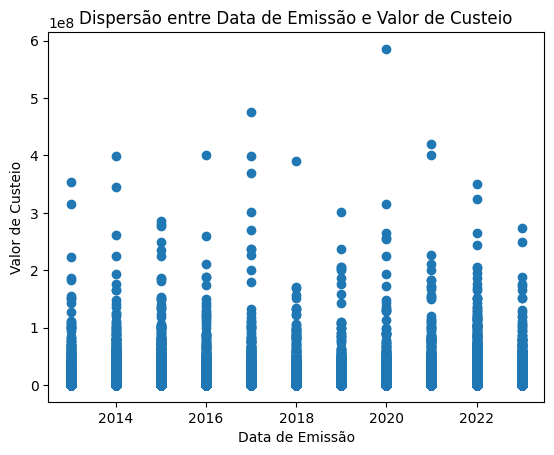

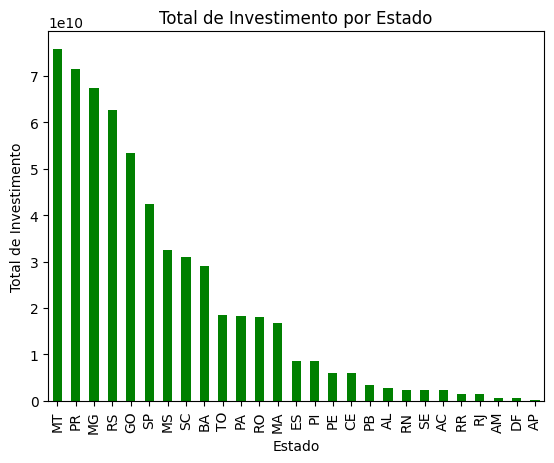

In [84]:
# Gráfico de dispersão
plt.scatter(df["AnoEmissao"], df["VlCusteio"])
plt.xlabel("Data de Emissão")
plt.ylabel("Valor de Custeio")
plt.title("Dispersão entre Data de Emissão e Valor de Custeio")
plt.show()

df_grouped = df.groupby("nomeUF")["VlInvestimento"].sum()
df_grouped_sorted = df_grouped.sort_values(ascending=False)
df_grouped_sorted.plot(kind="bar", color="g")
plt.xlabel("Estado")
plt.ylabel("Total de Investimento")
plt.title("Total de Investimento por Estado")
plt.show()



In [85]:
pip install geopandas matplotlib

In [88]:
colunas_objeto = df.select_dtypes(include=['object']).columns


In [89]:
import geopandas as gpd

# Read the shapefile
gdf = gpd.read_file("/content/BR_UF_2022.shp")

# Print the first few rows of the GeoDataFrame
print(gdf.head())


  CD_UF      NM_UF SIGLA_UF NM_REGIAO     AREA_KM2  \
0    12       Acre       AC     Norte   164173.429   
1    13   Amazonas       AM     Norte  1559255.881   
2    15       Pará       PA     Norte  1245870.704   
3    16      Amapá       AP     Norte   142470.762   
4    17  Tocantins       TO     Norte   277423.627   

                                            geometry  
0  POLYGON ((-68.79282 -10.99957, -68.79367 -10.9...  
1  POLYGON ((-56.76292 -3.23221, -56.76789 -3.242...  
2  MULTIPOLYGON (((-48.97548 -0.19834, -48.97487 ...  
3  MULTIPOLYGON (((-51.04561 -0.05088, -51.05422 ...  
4  POLYGON ((-48.24830 -13.19239, -48.24844 -13.1...  


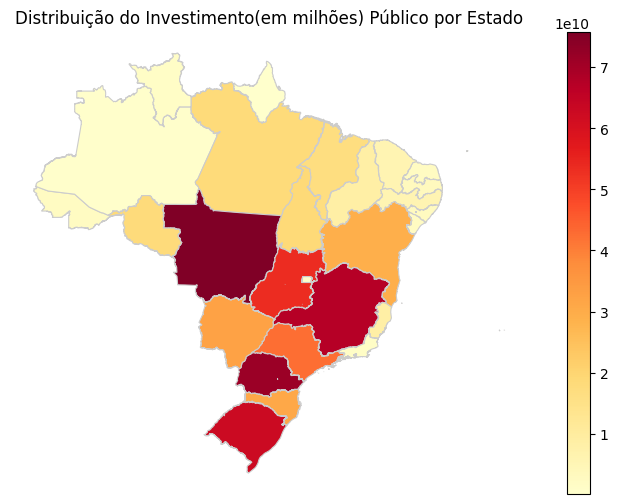

In [90]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Carregar o shapefile dos estados do Brasil (Certifique-se de ter o arquivo "estados.shp" no diretório)
shapefile_path = "/content/BR_UF_2022.shp"
map_df = gpd.read_file(shapefile_path)

# Agrupar e calcular o investimento total por estado
df_grouped = df.groupby("nomeUF")["VlInvestimento"].sum().reset_index()

# Mesclar os dados do DataFrame com o shapefile
merged = map_df.set_index("SIGLA_UF").join(df_grouped.set_index("nomeUF"))

# Plotar o mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged.plot(column="VlInvestimento", cmap="YlOrRd", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)
ax.set_title("Distribuição do Investimento(em milhões) Público por Estado")
ax.set_axis_off()
plt.show()
